Our expectations: https://docs.google.com/document/d/1GYsmMG-CwEwakkOSN-LFgtitBdbR00y5iBy99sZl-BU/edit
### 1. Import packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. Load data

In [100]:
# Load cleaned successful data
s_projects = pd.read_csv('./data/projects/projects_cleaned.csv')
s_rewards = pd.read_csv('./data/rewards/rewards_cleaned.csv')
s_creaters = pd.read_csv('./data/creaters/creaters_cleaned.csv')

# Clear two unamed columns
s_projects.drop('Unnamed: 0', inplace = True, axis=1)
s_rewards.drop('Unnamed: 0', inplace = True, axis=1)
s_creaters.drop('Unnamed: 0', inplace = True, axis=1)

# Drop duplicates
s_projects = s_projects.drop_duplicates()
s_creaters = s_creaters.drop_duplicates()
s_rewards = s_rewards.drop_duplicates()


In [101]:
# Load cleaned failed data
f_projects = pd.read_csv('./data/failed/projects_cleaned.csv')
f_rewards = pd.read_csv('./data/failed/rewards.csv')
f_creaters = pd.read_csv('./data/failed/creaters.csv')

# Clear two unamed columns
f_projects.drop('Unnamed: 0', inplace = True, axis=1)
f_rewards.drop('Unnamed: 0', inplace = True, axis=1)
f_creaters.drop('Unnamed: 0', inplace = True, axis=1)

# Filter some successful projects
filter_ = f_projects[f_projects['status'] == 'Successful']
s_links = filter_[['pro_link','creater_link']]
f_projects = f_projects[f_projects['status'] == 'Failed']
for _,l in s_links.iterrows():
    f_rewards = f_rewards[f_rewards['pro_link'] != l['pro_link']]
    f_creaters = f_creaters[f_creaters['creater_link'] != l['creater_link']]

# Drop duplicates
f_projects = f_projects.drop_duplicates()
f_creaters = f_creaters.drop_duplicates()
f_rewards = f_rewards.drop_duplicates()


#### Clean data again

In [126]:
# Remove outliers of data
s_projects = s_projects[s_projects['percentage_fund'] < 1000] # some projects have millions percentage funds


In [127]:
# Clean backers, because some of them will be greater than 1000, ex: 1,160
def clean_backers(backers):
    try:
        res = float(backers)
    except:
        res = float(backers.replace(',',''))
    return res

In [143]:
s_projects['backers'] = s_projects['backers'].apply(lambda x: clean_backers(x))
f_projects['backers'] = s_projects['backers'].apply(lambda x: clean_backers(x))
s_rewards['num_backers'] = s_rewards['num_backers'].apply(lambda x: clean_backers(x))
f_rewards['num_backers'] = s_rewards['num_backers'].apply(lambda x: clean_backers(x))

In [148]:
# Change all of thumnail_type to lower case
s_projects['thumbnail_type'] = s_projects['thumbnail_type'].apply(lambda x: x.lower())

### 3. Data descriptions

#### 3.1 Number of projects, rewards, creators we have, both successful and failed

In [149]:
print('The number of successful projects: {}'.format(s_projects.shape[0]))
print('The number of successful rewards: {}'.format(s_rewards.shape[0]))
print('The number of successful creaters: {}'.format(s_creaters.shape[0]))

print('The number of failed projects: {}'.format(f_projects.shape[0]))
print('The number of failed rewards: {}'.format(f_rewards.shape[0]))
print('The number of failed creaters: {}'.format(f_creaters.shape[0]))

The number of successful projects: 11818
The number of successful rewards: 110993
The number of successful creaters: 11181
The number of failed projects: 221
The number of failed rewards: 1535
The number of failed creaters: 220


#### 3.2 The average, median, standard deviation of percentage_fund

In [135]:
percentage_fund = pd.concat([s_projects['percentage_fund'],f_projects['percentage_fund']])
print('Mean of percentage_fund: {}'.format(percentage_fund.mean()))
print('Standard deviation of percentage_fund: {}'.format(percentage_fund.std()))
print('Max of percentage_fund: {}'.format(percentage_fund.max()))
print('Min of percentage_fund: {}'.format(percentage_fund.min()))
print('Median of percentage_fund: {}'.format(percentage_fund.median()))

Mean of percentage_fund: 120.4745410748401
Standard deviation of percentage_fund: 52.77545554511748
Max of percentage_fund: 956.0
Min of percentage_fund: 0.0
Median of percentage_fund: 107.0


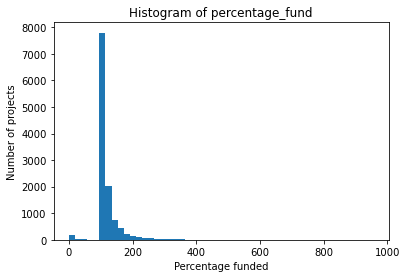

In [136]:
plt.hist(percentage_fund,bins=50)
plt.xlabel('Percentage funded')
plt.ylabel('Number of projects')
plt.title('Histogram of percentage_fund')
plt.show()

#### 3.3 The average, median, standard deviation of funded, target

In [137]:
funded = pd.concat([s_projects['funded'],f_projects['funded']])
print('Mean of funded: {}'.format(funded.mean()))
print('Standard deviation of funded: {}'.format(funded.std()))
print('Max of funded: {}'.format(funded.max()))
print('Min of funded: {}'.format(funded.min()))
print('Median of funded: {}'.format(funded.median()))

Mean of funded: 6327.1797491486
Standard deviation of funded: 11416.380325185257
Max of funded: 444390.0
Min of funded: 0.0
Median of funded: 4320.0


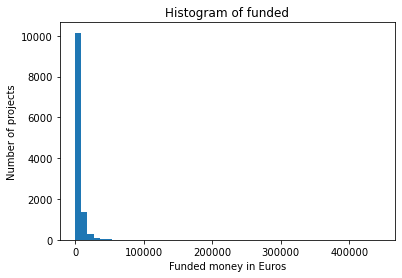

In [138]:
plt.hist(funded,bins=50)
plt.xlabel('Funded money in Euros')
plt.ylabel('Number of projects')
plt.title('Histogram of funded')
plt.show()

In [144]:
target = pd.concat([s_projects['target'],f_projects['target']])
print('Mean of target: {}'.format(target.mean()))
print('Standard deviation of target: {}'.format(target.std()))
print('Max of target: {}'.format(target.max()))
print('Min of target: {}'.format(target.min()))
print('Median of target: {}'.format(target.median()))

Mean of target: 5316.945178170944
Standard deviation of target: 8138.254335788316
Max of target: 360000.0
Min of target: 5.0
Median of target: 4000.0


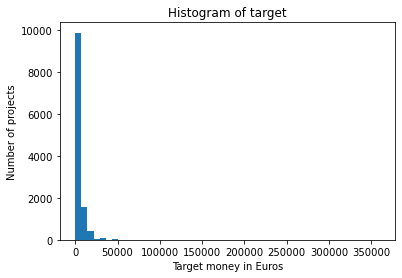

In [145]:
plt.hist(target,bins=50)
plt.xlabel('Target money in Euros')
plt.ylabel('Number of projects')
plt.title('Histogram of target')
plt.show()

#### 3.4 The average, median, standard deviation of backers

In [140]:
backers = pd.concat([s_projects['backers'],f_projects['backers']])
print('Mean of backers: {}'.format(backers.mean()))
print('Standard deviation of backers: {}'.format(backers.std()))
print('Max of backers: {}'.format(backers.max()))
print('Min of backers: {}'.format(backers.min()))
print('Median of backers: {}'.format(backers.median()))

Mean of backers: 97.34927949061662
Standard deviation of backers: 205.6162643503152
Max of backers: 10266.0
Min of backers: 1.0
Median of backers: 66.0


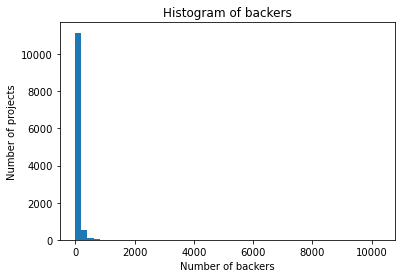

In [142]:
plt.figure()
plt.hist(backers,bins=50)
plt.xlabel('Number of backers')
plt.ylabel('Number of projects')
plt.title('Histogram of backers')
plt.show()

#### 3.5 The number of projects that have thumbnail is an jpeg, png, gif, or svg

In [155]:
thumbnail_type = pd.concat([s_projects['thumbnail_type'],f_projects['thumbnail_type']])
print('The number of projects with jpeg thumbnail: {}'.format(len(thumbnail_type[(thumbnail_type == 'jpg') | (thumbnail_type == 'jpg')])))
print('The number of projects with png thumbnail: {}'.format(len(thumbnail_type[thumbnail_type == 'png'])))
print('The number of projects with gif thumbnail: {}'.format(len(thumbnail_type[thumbnail_type == 'gif'])))
print('The number of projects with svg thumbnail: {}'.format(len(thumbnail_type[thumbnail_type == 'svg'])))


The number of projects with jpeg thumbnail: 8560
The number of projects with png thumbnail: 2582
The number of projects with gif thumbnail: 497
The number of projects with svg thumbnail: 1


#### 3.6 The average, median, standard deviation of the number of rewards

#### 3.7 The average, median, standard deviation of the number of comments

#### 3.8 The number of words in each text, the most frequent words, the number of spelling errors

### 4. Analysis

#### 4.1 Tables

#### 4.2 Graphs

#### 4.3 Linear Regression